# Pymaceuticals, Analysis in Drug testing Data

Pymaceuticals specializes in drug-based, anti-cancer pharmaceuticals. In their most recent efforts, they've since begun screening for potential treatments to squamous cell carcinoma (SCC), a commonly occurring form of skin cancer.
#
As Data Analyst, you've been given access to the complete data from their most recent animal study. In this study, 250 mice were treated through a variety of drug regimes over the course of 45 days. Their physiological responses were then monitored over the course of that time. Your objective is to analyze the data to show how four treatments (Capomulin, Infubinol, Ketapril, and Placebo) compare.
#.


#1- Creating a scatter plot that shows how the tumor volume changes over time for each treatment.
#2- Creating a scatter plot that shows how the number of metastatic (cancer spreading) sites changes over time for each treatment.
#3- Creating a scatter plot that shows the number of mice still alive through the course of treatment (Survival Rate)
#4- Creating a bar graph that compares the total % tumor volume change for each drug across the full 45 days.


In [19]:
%matplotlib notebook

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings

warnings.filterwarnings('ignore')


path_clinic_data = "Resources/Pymaceuticals_clinicaltrial_data.csv"
path_mouse_data = "Resources/Pymaceuticals_mouse_drug_data.csv"

clinic_data = pd.read_csv(path_clinic_data)
mouse_data = pd.read_csv(path_mouse_data)

clinic_data.head()
mouse_data.head()


merged_data = pd.merge(clinic_data, mouse_data, how="outer",on="Mouse ID" )

merged_data.head(15)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin
5,b128,25,43.262145,1,Capomulin
6,b128,30,40.605335,1,Capomulin
7,b128,35,37.967644,1,Capomulin
8,b128,40,38.379726,2,Capomulin
9,b128,45,38.982878,2,Capomulin


#  1 - Scatter plot that shows how the tumor volume changes over time for each treatment.


In [10]:
#IMPORT
from scipy.stats import sem

#GROUP THE DATA FRAME BY DRUG AND TIME
grouped_drug = merged_data.groupby(["Drug", "Timepoint"])



#GETTING THE MEAN() OF TUMOR COLUMN AND PUT IN DATA FRAME
Tumor_mean = grouped_drug["Tumor Volume (mm3)"].mean()

df1 = pd.DataFrame({ "Tumor Volume (mm3)" : Tumor_mean})



#GETTING THE STANDARD ERROR OF TUMOR AND PUT IN A DATA FRAME
Standard_error = grouped_drug["Tumor Volume (mm3)"].sem()

df2 = pd.DataFrame({"Standard Error" : Standard_error})

#df1
#df2

In [11]:

#RESENTING THE INDEX 
ResetIndex_by_drugs = df1.reset_index()
ResetIndex_by_error = df2.reset_index()


#SETING THE INDEX BY TIME AND SETTING COLUMNS BY DRUGS

Mean_index = ResetIndex_by_drugs.pivot(columns= "Drug", index= "Timepoint")["Tumor Volume (mm3)"]
df3 = pd.DataFrame(Mean_index)



#SETING THE INDEX BY TIME AND SETTING COLUMNS BY ERROR

Error_index = ResetIndex_by_error.pivot(columns= "Drug", index= "Timepoint")["Standard Error"]
df4 = pd.DataFrame(Error_index)


df3
#df4

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


<IPython.core.display.Javascript object>


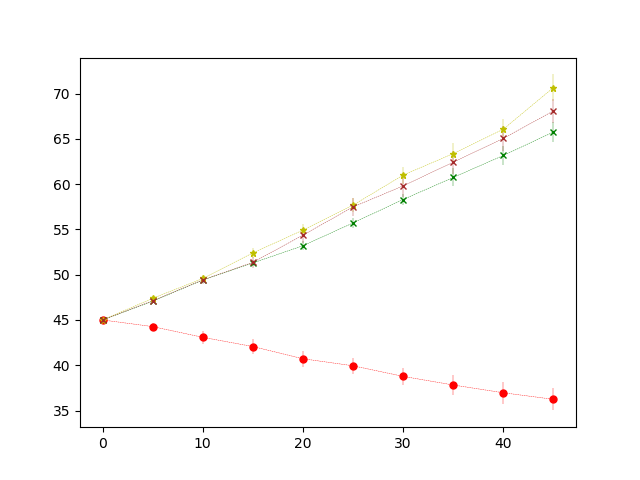

<IPython.core.display.Javascript object>


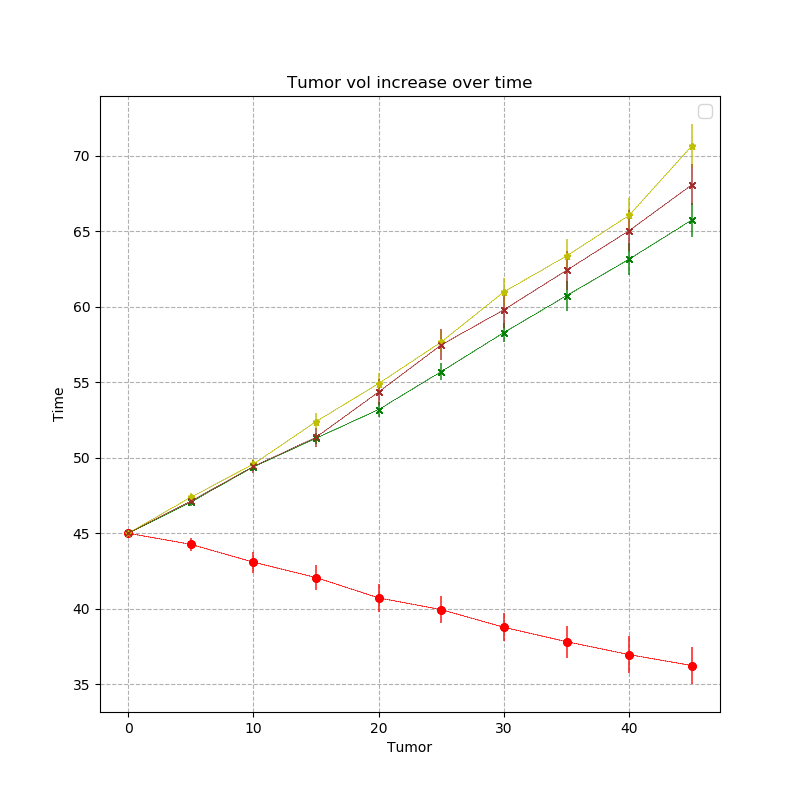

No handles with labels found to put in legend.


In [6]:
x_axis = np.arange(0,50,10)


plt.errorbar(df3.index, df3["Capomulin"], yerr=df4["Capomulin"],
             color="red", marker="o", markersize=5, linestyle="dashed", linewidth=0.3)


plt.errorbar(df3.index, df3["Infubinol"], yerr= df4["Infubinol"],
            color="green", marker="x", markersize=5, linestyle="dashed",linewidth=0.3)


plt.errorbar(df3.index, df3["Ketapril"], yerr=df4["Ketapril"],
             color="y", marker="*", markersize=5, linestyle="dashed", linewidth=0.3)


plt.errorbar(df3.index, df3["Placebo"], yerr= df4["Placebo"],
            color="brown", marker="x", markersize=5, linestyle="dashed",linewidth=0.3)




plt.figure(figsize=(8,8))

plt.grid(linestyle="dashed")
plt.legend(loc='best', fontsize=12)

plt.title("Tumor vol increase over time")
plt.xlabel("Tumor")
plt.ylabel("Time")

plt.show()

#  2 - Scatter plot that shows how the number of metastatic (cancer spreading) sites changes over time for each treatment.

In [12]:
#GETTING THE MEAN() OF METASTATIC COLUMN AND PUT IN DATA FRAME
Tumor_mean = grouped_drug["Metastatic Sites"].mean()

df3 = pd.DataFrame({ "Metastatic Mean()" : Tumor_mean})



#GETTING THE STANDARD ERROR OF TUMOR AND PUT IN A DATA FRAME
Standard_error = grouped_drug["Metastatic Sites"].sem()

df4 = pd.DataFrame({"Metastatic Sem()" : Standard_error})

#df3
#df4

In [13]:
#RESENTING THE INDEX 
ResetIndex_df3 = df3.reset_index()
ResetIndex_df4 = df4.reset_index()


#SETING THE INDEX BY TIME AND SETTING COLUMNS BY DRUGS

Mean_index2 = ResetIndex_df3.pivot(columns= "Drug", index="Timepoint")["Metastatic Mean()"]
df3_met = pd.DataFrame(Mean_index)



#SETING THE INDEX BY TIME AND SETTING COLUMNS BY ERROR

Error_index2 = ResetIndex_df4.pivot(columns= "Drug", index= "Timepoint")["Metastatic Sem()"]
df4_met = pd.DataFrame(Error_index)


df3_met
#df4_met

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [16]:
x_axis = np.arange(0,50,10)


# plt.errorbar(df3_met.index, df3_met["Capomulin"], yerr=df4_met["Capomulin"],
#              color="red", marker="o", markersize=5, linestyle="dashed", linewidth=0.3)


# plt.errorbar(df3_met.index, df3_met["Infubinol"], yerr= df4_met["Infubinol"],
#             color="green", marker="x", markersize=5, linestyle="dashed",linewidth=0.3)


# plt.errorbar(df3_met.index, df3_met["Ketapril"], yerr=df4_met["Ketapril"],
#              color="y", marker="*", markersize=5, linestyle="dashed", linewidth=0.3)


# plt.errorbar(df3_met.index, df3_met["Placebo"], yerr= df4_met["Placebo"],
#             color="brown", marker="x", markersize=5, linestyle="dashed",linewidth=0.3)

#   # get the current axes
# ax.relim()      # make sure all the data fits
# # ax.autoscale()

# plt.figure(figsize=(1,1))


# plt.grid(linestyle="dashed")
# plt.legend(loc='best', fontsize=12)

# plt.title("Metastatic vol increase over time")
# plt.xlabel("Metastatic")
# plt.ylabel("Time")

# plt.show()






plt.errorbar(df3.index, df3_met["Capomulin"], yerr=df4["Capomulin"],
             color="red", marker="o", markersize=5, linestyle="dashed", linewidth=0.3)


plt.errorbar(df3.index, df3_met["Infubinol"], yerr= df4["Infubinol"],
            color="green", marker="x", markersize=5, linestyle="dashed",linewidth=0.3)


plt.errorbar(df3.index, df3_met["Ketapril"], yerr=df4["Ketapril"],
             color="y", marker="*", markersize=5, linestyle="dashed", linewidth=0.3)


plt.errorbar(df3.index, df3_met["Placebo"], yerr= df4["Placebo"],
            color="brown", marker="x", markersize=5, linestyle="dashed",linewidth=0.3)




plt.figure(figsize=(8,8))

plt.grid(linestyle="dashed")
plt.legend(loc='best', fontsize=12)

plt.title("Tumor vol increase over time")
plt.xlabel("Tumor")
plt.ylabel("Time")

plt.show()

KeyError: 'Capomulin'

# 3 - Scatter plot that shows the number of mice still alive through the course of treatment (Survival Rate)

In [58]:
#COUNTING NUMBER OF MOUSES AND PUTTING IN DATA FRAME
Mouse_count = grouped_drug["Mouse ID"].count()

df5 = pd.DataFrame(Mouse_count)

df5_mean = df5["Mouse ID"].mean()
df5_sem = df5["Mouse ID"].sem()


#RESET INDEX --> DATA MUNGING TO HAVE "TIMEPOINT AS INDEX AN "DRUGS AS COLUMNS

ResetIndex_df5 = df5.reset_index()

df5_mouse = ResetIndex_df5.pivot(columns="Drug", index="Timepoint")

#df5_mouse

In [66]:
x_axis = np.arange(0,50,10)
y_axis = np.arange(0,101,10)



plt.plot(100* df5_mouse["Infubinol"/25],
            color="green", marker="x", markersize=5, linestyle="dashed",linewidth=0.3)


plt.plot(100* df5_mouse["Ketapril"]/25,
         color="y", marker="*", markersize=5, linestyle="dashed", linewidth=0.3)


plt.plot(100* (df5_mouse["Placebo"])/25,
            color="brown", marker="x", markersize=5, linestyle="dashed",linewidth=0.3)



plt.show()



plt.errorbar(df3.index, df3["Capomulin"], yerr=df4["Capomulin"],
             color="red", marker="o", markersize=5, linestyle="dashed", linewidth=0.3)


plt.errorbar(df3.index, df3["Infubinol"], yerr= df4["Infubinol"],
            color="green", marker="x", markersize=5, linestyle="dashed",linewidth=0.3)


plt.errorbar(df3.index, df3["Ketapril"], yerr=df4["Ketapril"],
             color="y", marker="*", markersize=5, linestyle="dashed", linewidth=0.3)


plt.errorbar(df3.index, df3["Placebo"], yerr= df4["Placebo"],
            color="brown", marker="x", markersize=5, linestyle="dashed",linewidth=0.3)




plt.figure(figsize=(8,8))

plt.grid(linestyle="dashed")
plt.legend(loc='best', fontsize=12)

plt.title("Tumor vol increase over time")
plt.xlabel("Tumor")
plt.ylabel("Time")

KeyError: 'Infubinol'

# 4 - Bar graph that compares the total % tumor volume change for each drug across the full 45 days.